In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. 데이터 준비하기
# Data 읽어들이기
train_data=pd.read_csv('C:\AI Psyc\mnist_train.csv',header=None)
print(train_data.head) # 첫번째 열이 target array
test_data=pd.read_csv('C:\AI Psyc\mnist_test.csv',header=None)
print(test_data.head)

# Input과 Target 나누고 데이터 형식 변환하기
Target_train = train_data.iloc[:,0].to_numpy()
Target_test = test_data.iloc[:,0].to_numpy()
Input_train = train_data.iloc[:,1:].to_numpy()
Input_test = test_data.iloc[:,1:].to_numpy()
print(Target_train.shape, Target_test.shape, Input_train.shape, Input_test.shape)

<bound method NDFrame.head of        0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        9    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    3    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    8    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780 

In [76]:
class ANN:
    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes
        self.epochs = epochs
        self.lr = lr

        # number of nodes in each layer
        self.n_input=self.sizes[0]
        self.n_hidden=self.sizes[1]
        self.n_output=self.sizes[2]

        # Weight between input and hidden layer
        limit = 1 / np.sqrt(self.n_input)
        self.W1 = np.random.uniform(-limit, limit, (self.n_input, self.n_hidden))
        
        # Weight between hidden layer and output
        limit = 1 / np.sqrt(self.n_hidden)
        self.W2 = np.random.uniform(-limit, limit, (self.n_hidden, self.n_output))

        self.L0 = []
        self.L1 = []
        self.L2 = []
        
        # bias vector
        self.bias0 = np.zeros((1, self.n_hidden))
        self.bias1 = np.zeros((1, self.n_output))

    def ReLU(self, x):
        return np.maximum(0,x)
    
    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True) 
        
        
    def forward_propagation(self, x_train):

        W1 = self.W1
        W2 = self.W2
        
        # input layer activations becomes sample
        L0= x_train
        self.L0 = L0

        # input layer to hidden layer 1
        z1 = np.dot(L0, W1)
        L1= self.ReLU(z1) + self.bias0
        self.L1 = L1
        
        # hidden layer 1 to hidden layer 2
        z2 = np.dot(L1, W2)
        L2= self.ReLU(z2) + self.bias1
        self.L2 = L2

        return L2
    
    def backward_propagation(self, y_train, output):
        L0 = np.array(self.L0, ndmin=2)
        L1 = np.array(self.L1, ndmin=2)
        L2 = np.array(self.L2, ndmin=2)
        Target = np.array(y_train.T, ndmin=2)
        W1 = self.W1
        W2 = self.W2
        
        # Calculate W2 update
        error = output - Target
        z2 = np.dot(L1.T, error.T* L2*(1-L2))
        
        # Calculate W1 update
        h_error = np.dot(error.T, W2.T)
        z1 = np.dot(L0.T, h_error*L1*(1-L1))

        # Update pamameters
        W2 += self.lr * z2
        W1 += self.lr * z1
        
        self.W1 = W1
        self.W2 = W2
        
        return [W1, W2]    
    
    def train(self, train_list, target_list, output_nodes):
        for iteration in range(self.epochs):
            predict = []
            hit_array = []
            for x in range(1000):
                output = self.forward_propagation(train_list)
                output = self.backward_propagation(output, target_list)

    def test(self, train_list, test_list, output_nodes):
        for iteration in range(self.epochs):
            prediction = []
            for x in range(1000):
                output = self.forward_propagation(Input_train)
                hit = 0
                if(np.argmax(Target_test[x])) == (np.argmax(output)):
                    hit+=1
            prediction.append(hit)
        plt.plot(prediction)
        plt.show()
        accuracy_score = np.mean(prediction) / 10 * 100
        print("Accuracy: ", round(accuracy_score, 2), "%")         
                

C:\Users\user\AppData\Local\Temp\ipykernel_5520\3779974932.py:67: RuntimeWarning: overflow encountered in multiply
  z2 = np.dot(L1.T, error.T* L2*(1-L2))
C:\Users\user\AppData\Local\Temp\ipykernel_5520\3779974932.py:71: RuntimeWarning: overflow encountered in multiply
  z1 = np.dot(L0.T, h_error*L1*(1-L1))


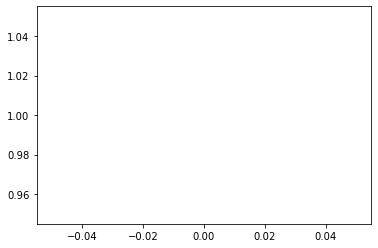

Accuracy:  10.0 %


In [77]:
ann = ANN(sizes=[784, 128, 10], epochs=1, lr=0.05)
ann.train(Input_train, Target_train, 10)
ann.test(Input_test, Target_test, 10)